In [42]:
import tributary.lazy as t
import pyEX as p
import pandas as pd
from datetime import datetime, timedelta

ModuleNotFoundError: No module named 'tributary.symbolic'

In [41]:
class MyPricer(t.BaseClass):
    def __init__(self, symbol='AAPL'):
        self.symbol = self.node('symbol', default_or_starting_value=symbol, trace=True)
        self.date = self.node('date', default_or_starting_value=datetime.today()-timedelta(days=1), trace=True)
        self.x = self.node('x', readonly=False, default_or_starting_value=1, trace=True)

    @t.node(trace=True)
    def _fetch_data(self, symbol, date):
        df = p.chartDF(symbol)
        date = pd.Timestamp(date.date())
        return df.loc[date].to_dict()
    
    @t.node(trace=True)
    def fetch_data(self):
        self._fetch_data().set(symbol=self.symbol(), date=self.date())
        return self._fetch_data()
        

In [38]:
m = MyPricer('AAPL')

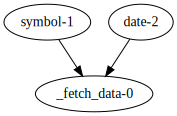

In [39]:
m.fetch_data().graphviz()

In [40]:
m.fetch_data()()

recomputing: _fetch_data-4723070512


{'change': -1.95,
 'changeOverTime': 0.0720886184927969,
 'changePercent': -1.033,
 'close': 186.79,
 'high': 192.88,
 'label': 'Mar 26',
 'low': 184.58,
 'open': 191.664,
 'unadjustedVolume': 49800538,
 'volume': 49800538,
 'vwap': 189.3728}